In [2]:
# import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Skip the first row which contains headers 'x' and 'y_final'
graphene_1_data = pd.read_csv('Graphene1_1000to3750_nobase.txt', header=None, skiprows=1)
graphine_2_data = pd.read_csv('Graphene2_1000to3750_nobase.txt', header=None, skiprows=1)

silicon_data = pd.read_csv('Silicon_50to930_nobase.txt', header=None, skiprows=1)

TiSe2_1_data = pd.read_csv('TiSe2_1_-300to300__nobase.txt', header=None, skiprows=1)
TiSe2_2_data = pd.read_csv('TiSe2_2_-300to300__nobase.txt', header=None, skiprows=1)

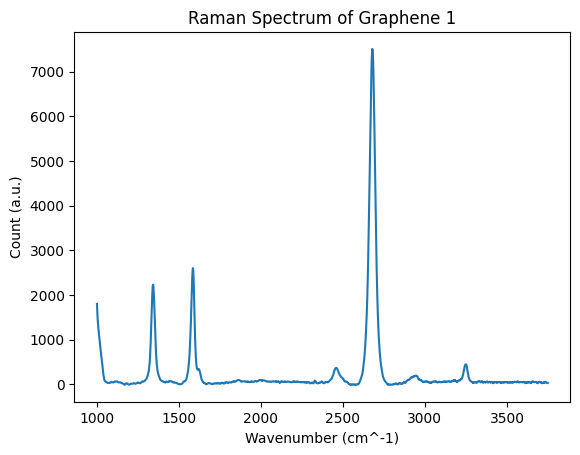

In [3]:
graphene_1_data.columns = ['Wavenumber', 'Count']
graphene_1_data.head()
plt.plot(graphene_1_data['Wavenumber'], graphene_1_data['Count'])
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of Graphene 1')
plt.show()

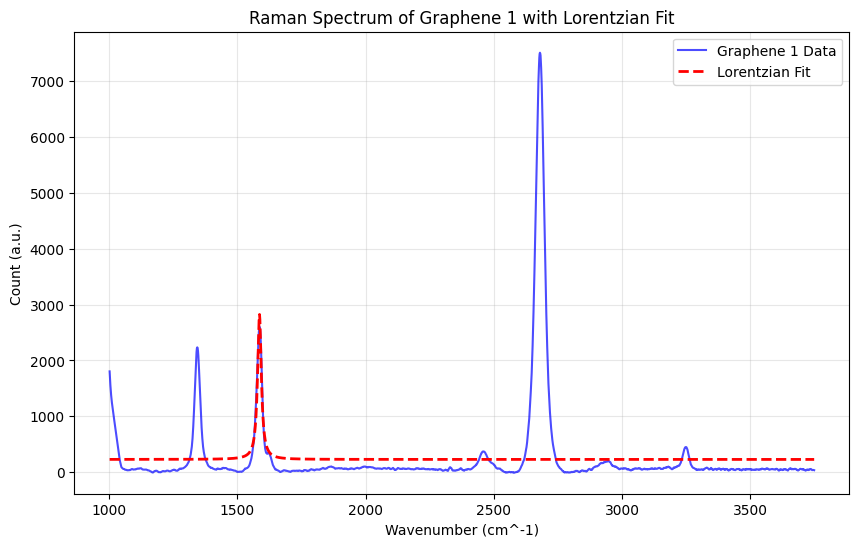

Fitted Parameters:
Peak Center: 1585.74 cm^-1
Amplitude: 2599.94
HWHM (Gamma): 8.80 cm^-1
FWHM: 17.60 cm^-1
Baseline Offset: 226.54


In [4]:
# Lorentzian fit for Graphene 1


# Define Lorentzian function
def lorentzian(x, amplitude, center, gamma, offset):
    """
    Lorentzian function
    amplitude: peak height
    center: peak center position
    gamma: half-width at half-maximum (HWHM)
    offset: baseline offset
    """
    return amplitude * (gamma**2 / ((x - center)**2 + gamma**2)) + offset

# Extract data
x_data = graphene_1_data['Wavenumber'].values
y_data = graphene_1_data['Count'].values

# Initial guess for parameters [amplitude, center, gamma, offset]
# Adjust these based on where you see the peak
initial_guess = [max(y_data), 1580, 20, min(y_data)]

# Perform the fit
popt, pcov = curve_fit(lorentzian, x_data, y_data, p0=initial_guess)

# Extract fitted parameters
amplitude_fit, center_fit, gamma_fit, offset_fit = popt

# Generate fitted curve
y_fit = lorentzian(x_data, *popt)

# Plot original data and fit
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'b-', label='Graphene 1 Data', alpha=0.7)
plt.plot(x_data, y_fit, 'r--', label='Lorentzian Fit', linewidth=2)
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of Graphene 1 with Lorentzian Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print fitted parameters
print(f"Fitted Parameters:")
print(f"Peak Center: {center_fit:.2f} cm^-1")
print(f"Amplitude: {amplitude_fit:.2f}")
print(f"HWHM (Gamma): {gamma_fit:.2f} cm^-1")
print(f"FWHM: {2*gamma_fit:.2f} cm^-1")
print(f"Baseline Offset: {offset_fit:.2f}")


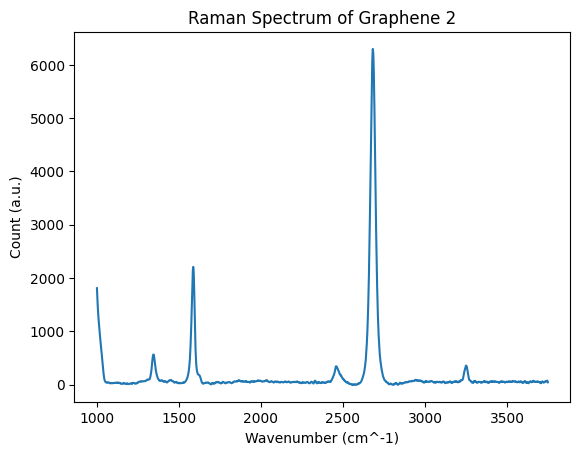

In [5]:
graphine_2_data.columns = ['Wavenumber', 'Count']
# graphine_2_data.head()
plt.plot(graphine_2_data['Wavenumber'], graphine_2_data['Count'])
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of Graphene 2')
plt.show()

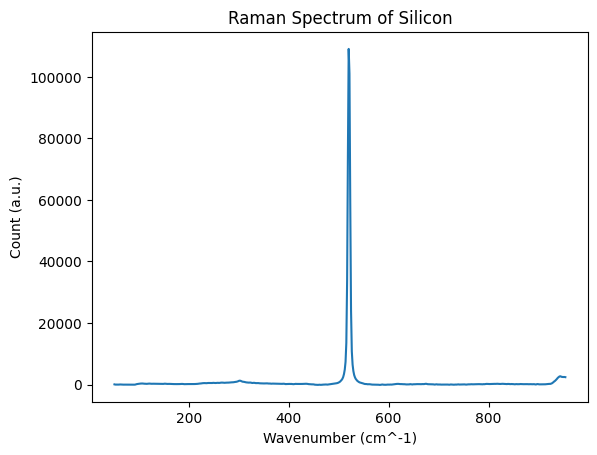

In [6]:
silicon_data.columns = ['Wavenumber', 'Count']
plt.plot(silicon_data['Wavenumber'], silicon_data['Count'])
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of Silicon')
plt.show()

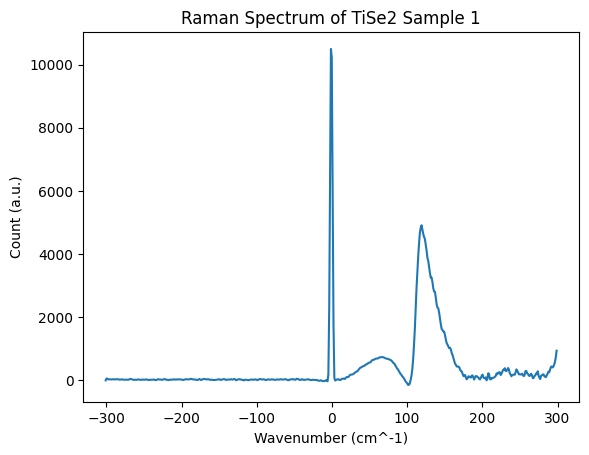

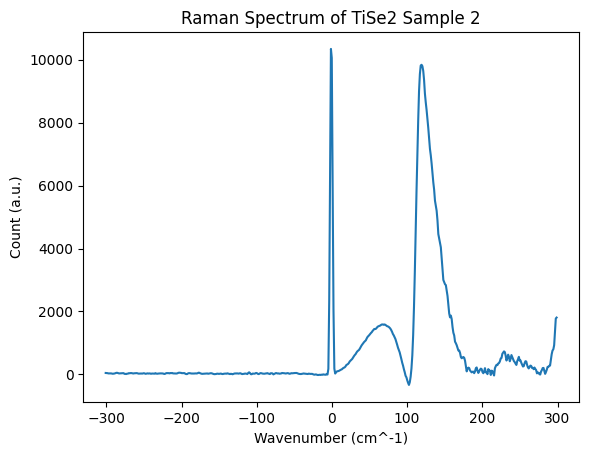

In [7]:
TiSe2_1_data.columns = ['Wavenumber', 'Count']
plt.plot(TiSe2_1_data['Wavenumber'], TiSe2_1_data['Count'])
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of TiSe2 Sample 1')
plt.show()
TiSe2_2_data.columns = ['Wavenumber', 'Count']
plt.plot(TiSe2_2_data['Wavenumber'], TiSe2_2_data['Count'])
plt.xlabel('Wavenumber (cm^-1)')  
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of TiSe2 Sample 2')
plt.show()